In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
survey = pd.read_csv("Topic_Survey_Assignment.csv")


In [6]:
survey.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [10]:
survey.columns = ["Topic", "Very interested", "Somewhat interested", "Not interested"]

In [11]:
survey.head()

,Topic,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [38]:
survey_sorted = survey.sort_values(['Very interested'], ascending= [False])
survey_sorted.head()

,Topic,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,1688,444,60
5,Machine Learning,1629,477,74
3,Data Visualization,1340,734,102
0,Big Data (Spark / Hadoop),1332,729,127
4,Deep Learning,1263,770,136


In [39]:
survey_sorted['Very interested']=round((survey_sorted['Very interested'] / 2233)*100,2)
survey_sorted['Somewhat interested']=round((survey_sorted['Somewhat interested'] / 2233)*100,2)
survey_sorted['Not interested']=round((survey_sorted['Not interested'] / 2233)*100,2)
survey_sorted


,Topic,Very interested,Somewhat interested,Not interested
1,Data Analysis / Statistics,75.59,19.88,2.69
5,Machine Learning,72.95,21.36,3.31
3,Data Visualization,60.01,32.87,4.57
0,Big Data (Spark / Hadoop),59.65,32.65,5.69
4,Deep Learning,56.56,34.48,6.09
2,Data Journalism,19.21,48.41,27.32


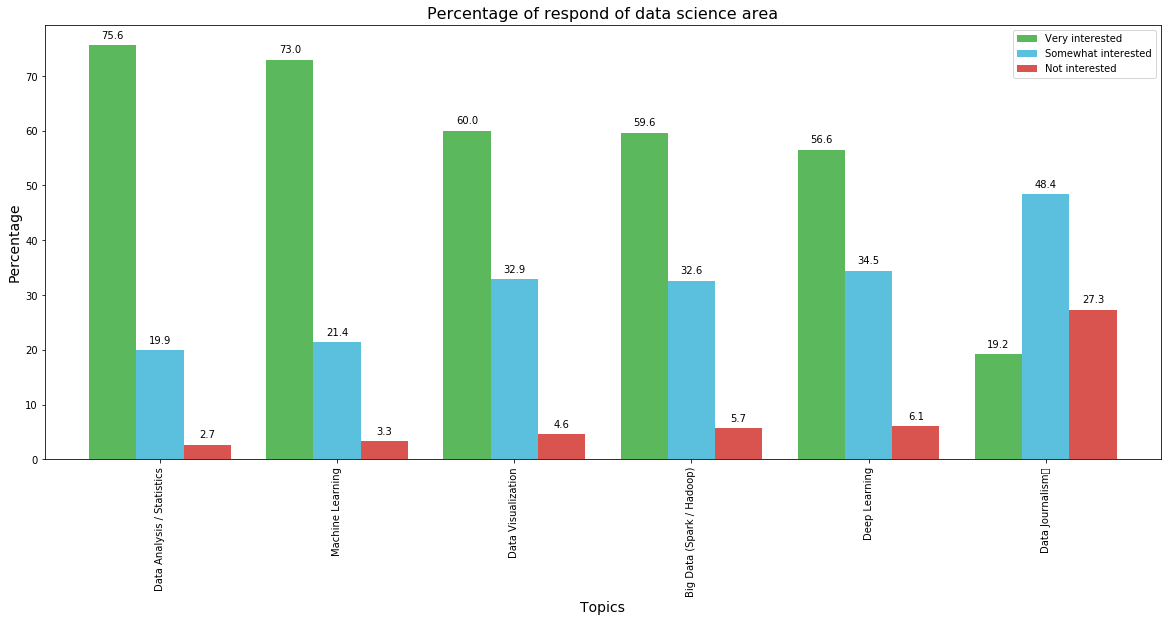

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt

pl = survey_sorted.plot(kind= 'bar', figsize= (20,8), width = 0.8, color= ['#5cb85c', '#5bc0de', '#d9534f'] )
pl.set_title('Percentage of respond of data science area', fontsize= 16)
pl.set_ylabel('Percentage', fontsize= 14)
pl.set_xlabel('Topics', fontsize=14)
pl.set_xticklabels(('Data Analysis / Statistics','Machine Learning', 'Data Visualization', 'Big Data (Spark / Hadoop)','Deep Learning','Data Journalism	'))

def add_value_labels(pl, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in pl.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        pl.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(pl)